In [122]:
import numpy as np
import pandas as pd
import matplotlib

from enn.enn import ENN
from pylmnn import LargeMarginNearestNeighbor as LMNN
from scipy.spatial.distance import euclidean, mahalanobis
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [123]:
path='winequality-red.csv'

df=pd.read_csv(path, ';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [124]:
df.shape

(1599, 12)

In [125]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [126]:
quality=df['quality'].groupby(df['quality']).count()
quality

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

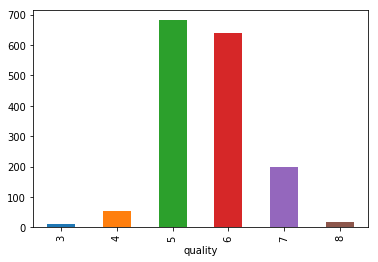

In [127]:
quality.plot('bar');

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

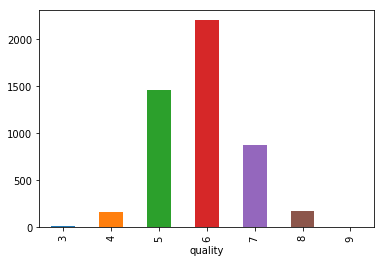

In [152]:
path='winequality-white.csv'
df_white=pd.read_csv(path, ';')
quality_white=df_white['quality'].groupby(df_white['quality']).count()
quality_white.plot('bar');
df_white.head()

In [128]:
# get column titles except the last column
features=df.columns[:-1].tolist()

# get data set features
X=df[features].values
# get labels
y=df['quality'].values

# split data to train data set and test data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

scores=[]

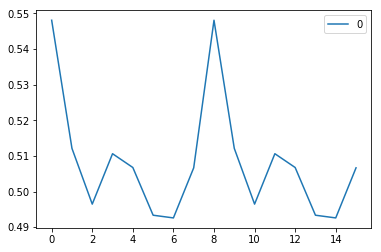

In [130]:
# loop k from 1 to 8, and get cross validation score of each K value
for k in range(1,9):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=5)
    score_mean=score_val.mean()
    scores.append(score_mean)

scores_df = pd.DataFrame(scores)
scores_df.plot()

In [133]:
# get index of maxium score along axis, default axis=0 for 1 dimensional array
best_k=np.argmax(scores)+1
print(best_k)
# generate KNN model
knn=KNeighborsClassifier(best_k)
# fit with train data set
knn.fit(X_train,y_train)
# get Modes presicion rate using test set
print("prediction precision rate:",knn.score(X_test,y_test))

1
prediction precision rate: 0.575


In [134]:
scores=[]
# loop k from 1 to 8, and get cross validation score of each K value
k_test, n_components, max_iter = 5, X.shape[1], 180
for k in range(1,9):
    # Instantiate the metric learner
    lmnn = LMNN(n_neighbors=k, max_iter=max_iter, n_components=n_components)
    # Train the metric learner
    lmnn.fit(X_train, y_train)
    # Fit the nearest neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k_test)
    knn.fit(lmnn.transform(X_train), y_train)
    score_val=cross_val_score(knn,lmnn.transform(X_train),y_train,scoring='accuracy',cv=5)
    score_mean=score_val.mean()
    scores.append(score_mean)


In [135]:
# get index of maxium score along axis, default axis=0 for 1 dimensional array
best_k=np.argmax(scores)+1
print(best_k)
# Instantiate the metric learner
lmnn = LMNN(n_neighbors=int(best_k), max_iter=max_iter, n_components=n_components)
# Train the metric learner
lmnn.fit(X_train, y_train)
# generate KNN model
knn=KNeighborsClassifier(n_neighbors=best_k)
# fit with train data set
knn.fit(lmnn.transform(X_train), y_train)
# get Modes presicion rate using test set
print("prediction precision rate:",knn.score(lmnn.transform(X_test),y_test))

4
prediction precision rate: 0.55625


In [138]:
# The implementation is based on libsvm. 
# The fit time complexity is more than quadratic with the number of samples 
# which makes it hard to scale to dataset with more than a couple of 10000 samples.

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
print("prediction precision rate:",clf.score(X_test,y_test))

prediction precision rate: 0.609375


In [140]:
y_pred = clf.predict(X_test)
print(clf)
print('Train scores')
print('accuracy_score = ', accuracy_score(y_test, y_pred))
print('precision_score = ', precision_score(y_test, y_pred, average='macro'))
print('recall_score = ', recall_score(y_test, y_pred, average='macro'))
print('f1_score = ', f1_score(y_test, y_pred, average='macro'))
#print('roc_auc_score = ', roc_auc_score(y_train, y_pred))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Train scores
accuracy_score =  0.609375
precision_score =  0.3050521121564287
recall_score =  0.2714344941956882
f1_score =  0.27577396763443274


/home/leybal/projects/ds_course/penv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/leybal/projects/ds_course/penv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [141]:
y_pred, y_test

(array([5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5,
        5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6,
        5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5,
        6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 5, 6,
        5, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6,
        6, 5, 6, 6, 5, 7, 5, 5, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 7, 6, 6, 5,
        6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5,
        6, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 7, 5, 6, 5, 5, 7, 6,
        6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5,
        5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5,
        5, 5, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6,
        7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6,
        5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5,
        6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 

In [142]:
clf = ENN()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf)
print('Train scores')
print('accuracy_score = ', accuracy_score(y_test, y_pred))
print('precision_score = ', precision_score(y_test, y_pred, average='macro'))
print('recall_score = ', recall_score(y_test, y_pred, average='macro'))
print('f1_score = ', f1_score(y_test, y_pred, average='macro'))

ENN(distance_function=<function euclidean at 0x7fb93a9f7840>, k=3)
Train scores
accuracy_score =  0.4375
precision_score =  0.24299692365278217
recall_score =  0.3027103493521404
f1_score =  0.24247424816850763


In [143]:
# Улучшение скора
# Get balanced sample by oversampling
df3=df[df['quality']==3]
df4=df[df['quality']==4]
df5=df[df['quality']==5]
df6=df[df['quality']==6]
df7=df[df['quality']==7]
df8=df[df['quality']==8]

df3=pd.concat([df3]*50)
df4=pd.concat([df4]*10)
df7=pd.concat([df7]*3)
df8=pd.concat([df8]*29)

df_balanced=pd.concat([df3,df4,df5,df6,df7,df8])
df_balanced.shape

(3468, 12)

In [144]:
type=df_balanced['quality'].groupby(df_balanced['quality']).count()
type

quality
3    500
4    530
5    681
6    638
7    597
8    522
Name: quality, dtype: int64

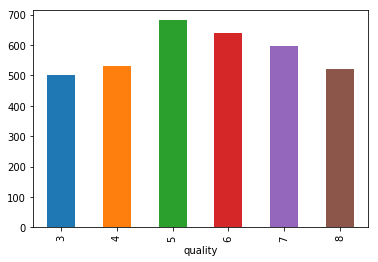

In [145]:
type.plot('bar')

In [146]:
# df.columns is column labels property
features=df_balanced.columns[:-1].tolist()
X=df_balanced[features].values
y=df_balanced['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [147]:
scores=[]
for i in range(40):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
print("prediction precision rate:",knn.score(X_test,y_test))

best K is: 1
prediction precision rate: 0.8544668587896254
